

# Project: Investigate the Noshowappointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.  ‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital.  ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.  ‘Notshow’ is 'no' if patient showed up to their appointment, and ‘Yes’ if they did not show up.

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [4]:
# load dataset.
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('noshowappointments.csv')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The meanings of the columns: ‘ScheduledDay’ tells us on what day the patient set up their appointment.‘Neighborhood’ indicates the location of the hospital.‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 'No-show' says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [6]:
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Clearly, there are 110527 rows altogether. There are no missing values for the 14 columns.



### Data Cleaning

In [9]:
# Apparently, PatientId and AppointmentID are not related to showup. So I drop these two columns in order to furtherly analysis.
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# obviously, age should not be -1, I drop the row with age = -1
# to locate which lines have the errant value
df[df.Age == -1]


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# to delete the specific line
df.drop(df[df.Age == -1].index, inplace=True)

In [12]:
# Check if the row was deleted
df[df.Age == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### The cleaning of 'Handcap' column

In [13]:
# obviously, Handcap is 0 or 1, and should not be 2, 3, 4
# to locate which lines have the errant values
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [14]:
# to replace 2,3 and 4 with 1

df['Handcap'].replace(2, 1,inplace = True)

In [15]:
# Check if the row was deleted
df['Handcap'].value_counts()

0    108285
1      2225
3        13
4         3
Name: Handcap, dtype: int64

In [16]:
df['Handcap'].replace(3, 1,inplace = True)

In [17]:
df['Handcap'].replace(4, 1,inplace = True)

In [18]:
# to see the result after the replacements
df['Handcap'].value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

### Check if the dataset has duplicated rows

In [19]:
sum(df.duplicated())

635

In [20]:
# delete the duplicated rows
df.drop_duplicates(inplace = True)

In [21]:
# TO see if there is still duplicated rows
sum(df.duplicated())

0

In [22]:
# to see the result after data cleaning
df.shape

(109891, 12)

<a id='eda'></a>
## Exploratory Data Analysis


### The histograms of varibles 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06a17ff5c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f06a10296d8>]], dtype=object)

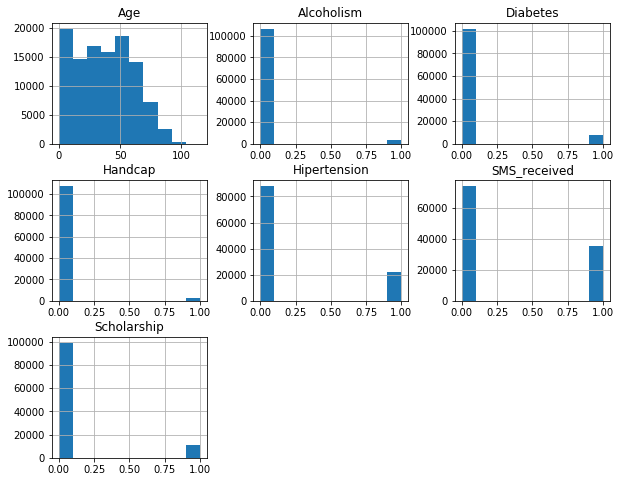

In [23]:
df.hist(figsize = (10,8))

In [24]:
# TO see the new statistics of varibles after cleaning
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000
mean,37.089853,0.098288,0.197250,0.071826,0.030430,0.020193,0.322884
std,23.121015,0.297705,0.397924,0.258200,0.171769,0.140660,0.467581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###  1. The relationship between age and showup

In [25]:
# Rename No-show to noshow
df.rename(columns = {'No-show':'noshow'}, inplace = True)

# confirm changes
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
# the original values (Yes and No) of column 'noshow' are not easily understood. I replace them with other words.
showup = df.noshow == "No"
notshowup = df.noshow == "Yes"

In [27]:
# calculate the mean of Age when patients showed up
df.Age[showup].mean()

37.796122697709386

In [28]:
# calculate the mean of Age when patients did not show up
df.Age[notshowup].mean()

34.283917096569823

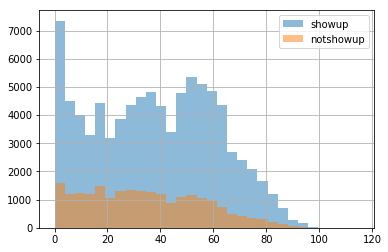

In [29]:
# show the visulization of the two varibles
df.Age[showup].hist(alpha = 0.5, bins = 30, label = 'showup')
df.Age[notshowup].hist(alpha = 0.5, bins = 30, label = 'notshowup')
plt.legend()

From the means and histogram, we can see those who showed up are elder than those who did not show up.

###  2. The relationship between scholarship and showup
o is false, 1 is true. The mean of Scholarship is 0.098, which means more than 90% patients are not enrolled in Brasilian welfare program.

In [30]:
# calculate the mean of Scholarship when patients showed up
scho_1 = df.Scholarship[showup].mean()
scho_1

0.09391409337874318

In [31]:
# calculate the mean of Scholarship when patients did not showed up
scho_2 = df.Scholarship[notshowup].mean()
scho_2

0.11566657616073853

In [32]:
# since "noshow" is not a numeric varible, the scatter picture like below does not work
# df.plot(x = "noshow", y = "Sholarship", kind = "scatter")

Text(0,0.5,'mean of Scholarship')

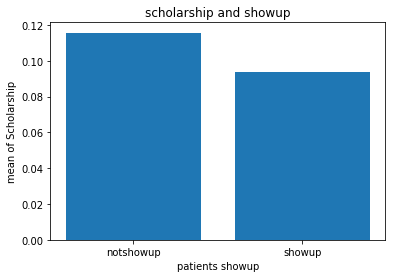

In [57]:
plt.bar(["showup", "notshowup"], [scho_1, scho_2])
plt.title('scholarship and showup')
plt.xlabel('patients showup')
plt.ylabel( 'mean of Scholarship')

####  For the two gruoups of patients who did showup and did not showup. The similarity is most patients are not enrolled the welfare system. The difference is there are less program-ernrolled patients within the group of showup.
#### Within the group of the patients who showed up, less patients are enrolled into the welfare program. This means if patients pay the medical cost by themselves (not by national welfare program), they are more likely to show up for the appointments.


###  3. The relationship between Hipertension and showup
o is false, 1 is true. The mean of Hipertension is 0.197, which means more than 80% patients have hipertension.

In [34]:
# calculate the mean of Hipertension when patients showed up
hiper_1 = df.Hipertension[showup].mean()
hiper_1

0.20443543334890024

In [35]:
# calculate the mean of Hipertension when patients did not showed up
hiper_2 = df.Hipertension[notshowup].mean()
hiper_2

0.16870305004977826

Text(0,0.5,'mean of Hipertension ')

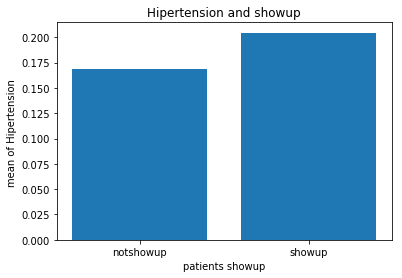

In [58]:
plt.bar(["showup", "notshowup"], [hiper_1, hiper_2])
plt.title('Hipertension and showup')
plt.xlabel('patients showup')
plt.ylabel('mean of Hipertension ')

#### Within the group of the patients who showed up, more patients have hipertension. This means if a patient has hipertension, he or she is more likely to show up for the appointments.

###  4. The relationship between Diabetes and showup
o is false, 1 is true. The mean of Diabetes is 0.072, which means 92.3% patients have diabetes.

In [37]:
# calculate the mean of Diabetes when patients showed up
diabetes_1 = df.Diabetes[showup].mean()
diabetes_1

0.073707470982880177

In [38]:
# calculate the mean of Diabetes when patients did not showed up
diabetes_2 = df.Diabetes[notshowup].mean()
diabetes_2

0.064349714906326363

Text(0,0.5,'mean of Diabetes')

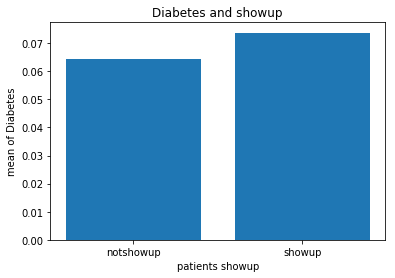

In [59]:
plt.bar(["showup", "notshowup"], [diabetes_1, diabetes_2])
plt.title('Diabetes and showup')
plt.xlabel('patients showup')
plt.ylabel('mean of Diabetes')

#### Within the group of the patients who showed up, more patients have diabetes. This means if a patient has diabetes, he or she is more likely to show up for the appointments.

###  5. The relationship between Alcoholism and showup
o is false, 1 is true. The mean of Alcoholism is 0.03, which means 97% patients have alcoholism.

In [40]:
# calculate the mean of Alcoholism when patients showed up
alcoholism_1 = df.Alcoholism[showup].mean()
alcoholism_1

0.030480790040208216

In [41]:
# calculate the mean of Alcoholism when patients did not showed up
alcoholism_2 = df.Alcoholism[notshowup].mean()
alcoholism_2

0.030228979998189881

Text(0,0.5,'mean of Alcoholism')

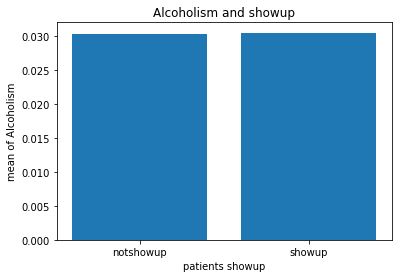

In [61]:
plt.bar(["showup", "notshowup"], [alcoholism_1, alcoholism_2])
plt.title('Alcoholism and showup')
plt.xlabel('patients showup')
plt.ylabel('mean of Alcoholism')

####  The two means are almost the same. This means alcoholism has no clear correlation with showup.

### 6. The relationship between Handcap and showup
o is false, 1 is true. The mean of Handcap is 0.02, which means 98% patients have no handcap.

In [43]:
# calculate the mean of Handcap when patients showed up
handcap_1 = df.Handcap[showup].mean()
handcap_1

0.020730582164865081

In [44]:
# calculate the mean of Handcap when patients did not showed up
handcap_2 = df.Handcap[notshowup].mean()
handcap_2

0.018055932663589465

Text(0,0.5,'mean of Handcap')

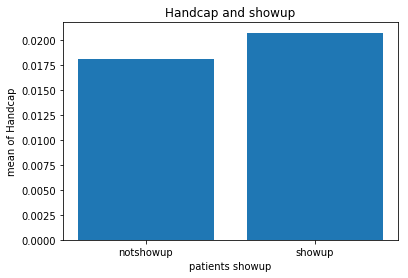

In [62]:
plt.bar(["showup", "notshowup"], [handcap_1, handcap_2])
plt.title('Handcap and showup')
plt.xlabel('patients showup')
plt.ylabel('mean of Handcap')

#### Within the group of the patients who showed up, more patients have handcap. This means if a patient has handcap, he or she is more likely to show up for the appointments. The possible reason might be missing appointments would incur more inconvience and cost for those who have handcap.

###  7. The relationship between SMS_received and showup
the mean of SMS_received is 0.32, which means 32% of patients received SMS.

In [46]:
# calculate the mean of SMS_received when patients showed up
SMS_1 = df.SMS_received[showup].mean()
SMS_1

0.29271126399599057

In [47]:
# calculate the mean of SMS_received when patients did not showed up
SMS_2 = df.SMS_received[notshowup].mean()
SMS_2

0.44275500045252963

Text(0,0.5,'mean of SMS_received')

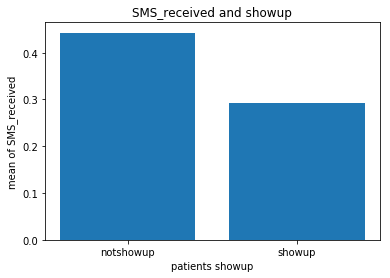

In [55]:
plt.bar(["showup", "notshowup"], [SMS_1, SMS_2])
plt.title('SMS_received and showup')
plt.xlabel('patients showup')
plt.ylabel('mean of SMS_received')

#### In theory, SMS notice should have postitive effect to remind patients. but the statistics show within the showup group, fewer received SMS. So, SMS_received does not have the assumptive effect to reduce missing appointments.

###  8. The relationship between Gender and showup


In [48]:
# to descript the gender of samples
df['Gender'].value_counts()

F    71416
M    38475
Name: Gender, dtype: int64

In [49]:
# calculate the mean of SMS_received when patients showed up
#gender_1 = df.Gender[showup].mean()
df.groupby('Gender')['noshow'].value_counts()

Gender  noshow
F       No        56961
        Yes       14455
M       No        30832
        Yes        7643
Name: noshow, dtype: int64

#### for the female, the showup percentage is 56961/(56961+14455) = 79.76%
#### for the male, the showup percentage is 30822/(30822+7643) = 80.113%
#### the male patients have a slightly higher percentage of showup than the female patients

###  9. Scatterplots of Age against showup

In [63]:
# The describe of noshow
df['noshow'].value_counts()

No     87793
Yes    22098
Name: noshow, dtype: int64

In [67]:
# change the "Yes"and "No" into numeric value
df['noshow'].replace('No', 1,inplace = True)

In [68]:
df['noshow'].replace('Yes', 0,inplace = True)

In [69]:
# check after replacements
df['noshow'].value_counts()

1    87793
0    22098
Name: noshow, dtype: int64

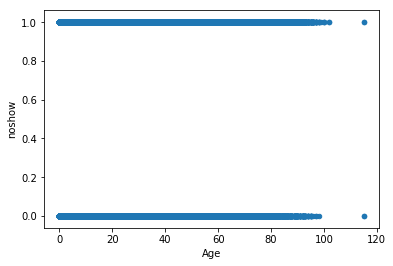

In [73]:
scatterplot of the two varibles
df.plot(x = "Age", y = "noshow",kind = "scatter")

#### missing appointments happened within different age groups. I can not see obvious trend within age group. Combining the analysis above, yong patients are more likely to miss appointments.

##  Factors are important to predict if a patient will show up for appointment
### Age, Scholarship,  Hipertension, Diabetes and Handcap are important to predict if a patient will show up for appointment. But Alcoholism is not important to predict. 


<a id='conclusions'></a>
## Conclusions


###    In this report, I analysis eight factors which might affect the misssing appointments. It seems physical conditions, like hipertension and diabetes, would increase the chance of showing up.Due to the low percentage of SMS_received, it has not positive effect on showing up. 
###   1 Age and showup are positively correlated. elder patients tend to attend medical appointments more timely than young patients. 
### 2 Scholarship and showup. If patients do not have scholarship, and pay the medical cost by themselves (not by national welfare program), they are more likely to show up for the appointments.
### 3 Hipertension and showup. Within the group of the patients who showed up, more patients have hipertension. This means if a patient has hipertension, he or she is more likely to show up for the appointments.
### 4 Diabetes and showup. This means if a patient has diabetes, he or she is more likely to show up for the appointments.
### 5 Alcoholism and showup.alcoholism has no clear correlation with showup.
### 6 Handcap and showup. if a patient has handcap, he or she is more likely to show up for the appointments. The possible reason might be missing appointments would incur more inconvience and cost for those who have handcap.
### 7 SMS_received and showup. the statistics show within the showup group, fewer received SMS. So, SMS_received does not have the assumptive effect to reduce missing appointments.
### 8 Gender and showup. The male patients have a slightly higher percentage of showup than the female patients
###  With regards to the limitations of the exploration, I haven't done linear regression statistical tests because the "notshowup" is a boolean varible, Histograms only provide descriptive statistics for the samples analyses. 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])